<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Example1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries if they are not already installed
# !pip install pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Data Collection (Example: Simulated Pharmacy Data)
# Simulate pharmacy prescription data
def collect_data():
    data = {
        'Prescription_ID': range(1, 11),
        'Drug_Name': ['Drug_A', 'Drug_B', 'Drug_C', 'Drug_A', 'Drug_B', 'Drug_C', 'Drug_A', 'Drug_B', 'Drug_C',''],
        'Patient_Age': [34, 67, 50, 45, 72, 30, 65, 60, 40, 38],
        'Dosage_mg': [20, 50, 10, 20, 50, 10, 20, 50, 10, 20],
        'Duration_days': [30, 15, 60, 45, 10, 30, 20, 15, 60, 45],
        'Pharmacy_Name': ['Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X']
    }
    df = pd.DataFrame(data)
    return df

pharmacy_data = collect_data()
print("Raw Pharmacy Data:")
print(pharmacy_data.tail())
print(pharmacy_data.shape)

Raw Pharmacy Data:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
5                6    Drug_C           30         10             30   
6                7    Drug_A           65         20             20   
7                8    Drug_B           60         50             15   
8                9    Drug_C           40         10             60   
9               10                     38         20             45   

  Pharmacy_Name  
5      Pharma_Z  
6      Pharma_X  
7      Pharma_Y  
8      Pharma_Z  
9      Pharma_X  
(10, 6)


In [ ]:
# prompt: ช่วยตรวจสอบ null หรือ na ใน pharmacy_data ให้หน่อยครับ

# Check for null or NA values in the pharmacy_data DataFrame
print("\nNull or NA values in the DataFrame:")
print(pharmacy_data.isnull().sum())



Null or NA values in the DataFrame:
Prescription_ID    0
Drug_Name          0
Patient_Age        0
Dosage_mg          0
Duration_days      0
Pharmacy_Name      0
dtype: int64


In [ ]:
# 2. Data Cleaning (Example: Handle Missing Values, Duplicates)
def clean_data(df):
    # Add some NaN values for example
    df.loc[0, 'Patient_Age'] = np.nan
    df.loc[3, 'Duration_days'] = np.nan
    print("\nData with missing values:")
    print(df)

    # Fill missing values (e.g., mean for Age, forward fill for Duration)
    df['Patient_Age'].fillna(df['Patient_Age'].mean(), inplace=True)
    #df = df['Patient_Age'].fillna(df['Patient_Age'].mean())
    df['Duration_days'].fillna(method='ffill', inplace=True)

    # Remove any duplicate rows if they exist
    df.drop_duplicates(inplace=True)
    return df

cleaned_data = clean_data(pharmacy_data)
print("\nCleaned Data:")
print(cleaned_data.head())



Data with missing values:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A          NaN         20           30.0   
1                2    Drug_B         67.0         50           15.0   
2                3    Drug_C         50.0         10           60.0   
3                4    Drug_A         45.0         20            NaN   
4                5    Drug_B         72.0         50           10.0   
5                6    Drug_C         30.0         10           30.0   
6                7    Drug_A         65.0         20           20.0   
7                8    Drug_B         60.0         50           15.0   
8                9    Drug_C         40.0         10           60.0   
9               10    Drug_A         38.0         20           45.0   

  Pharmacy_Name  
0      Pharma_X  
1      Pharma_Y  
2      Pharma_Z  
3      Pharma_X  
4      Pharma_Y  
5      Pharma_Z  
6      Pharma_X  
7      Pharma_Y  
8      Pharma_Z  
9      Phar

<ipython-input-4-6cfeb1c187a6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Patient_Age'].fillna(df['Patient_Age'].mean(), inplace=True)
<ipython-input-4-6cfeb1c187a6>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# 3. Data Structuring (Example: Reformat Data for Analysis)
def structure_data(df):
    # Pivot the data to see total dosage per pharmacy and drug
    structured_df = df.pivot_table(values='Dosage_mg', index='Pharmacy_Name', columns='Drug_Name', aggfunc='sum', fill_value=0)
    return structured_df

structured_data = structure_data(cleaned_data)
print("\nStructured Data (Pivot Table):")
print(structured_data.head())



Structured Data (Pivot Table):
Drug_Name      Drug_A  Drug_B  Drug_C
Pharmacy_Name                        
Pharma_X           80       0       0
Pharma_Y            0     150       0
Pharma_Z            0       0      30


In [ ]:

# 4. Data Enrichment (Example: Add a Derived Column)
def enrich_data(df):
    # Add a column calculating total dosage over the duration of the prescription
    df['Total_Dosage'] = df['Dosage_mg'] * df['Duration_days']
    return df

enriched_data = enrich_data(cleaned_data)
print("\nEnriched Data with Total Dosage:")
print(enriched_data.head())



Enriched Data with Total Dosage:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A    51.888889         20           30.0   
1                2    Drug_B    67.000000         50           15.0   
2                3    Drug_C    50.000000         10           60.0   
3                4    Drug_A    45.000000         20           60.0   
4                5    Drug_B    72.000000         50           10.0   

  Pharmacy_Name  Total_Dosage  
0      Pharma_X         600.0  
1      Pharma_Y         750.0  
2      Pharma_Z         600.0  
3      Pharma_X        1200.0  
4      Pharma_Y         500.0  


In [ ]:

# 5. Data Transformation (Example: Normalize and Aggregate Data)
def transform_data(df):
    # Normalize the Dosage column (scaling between 0 and 1)
    df['Dosage_mg_normalized'] = (df['Dosage_mg'] - df['Dosage_mg'].min()) / (df['Dosage_mg'].max() - df['Dosage_mg'].min())

    # Aggregate data by Pharmacy_Name to see total dosage for each pharmacy
    aggregated_data = df.groupby('Pharmacy_Name').agg({'Total_Dosage': 'sum'}).reset_index()

    return df, aggregated_data

transformed_data, aggregated_data = transform_data(enriched_data)
print("\nTransformed Data with Normalized Dosage:")
print(transformed_data.head())
print("\nAggregated Data by Pharmacy:")
print(aggregated_data.head())


Transformed Data with Normalized Dosage:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A    51.888889         20           30.0   
1                2    Drug_B    67.000000         50           15.0   
2                3    Drug_C    50.000000         10           60.0   
3                4    Drug_A    45.000000         20           60.0   
4                5    Drug_B    72.000000         50           10.0   

  Pharmacy_Name  Total_Dosage  Dosage_mg_normalized  
0      Pharma_X         600.0                  0.25  
1      Pharma_Y         750.0                  1.00  
2      Pharma_Z         600.0                  0.00  
3      Pharma_X        1200.0                  0.25  
4      Pharma_Y         500.0                  1.00  

Aggregated Data by Pharmacy:
  Pharmacy_Name  Total_Dosage
0      Pharma_X        3100.0
1      Pharma_Y        2000.0
2      Pharma_Z        1500.0



Data is consistent.


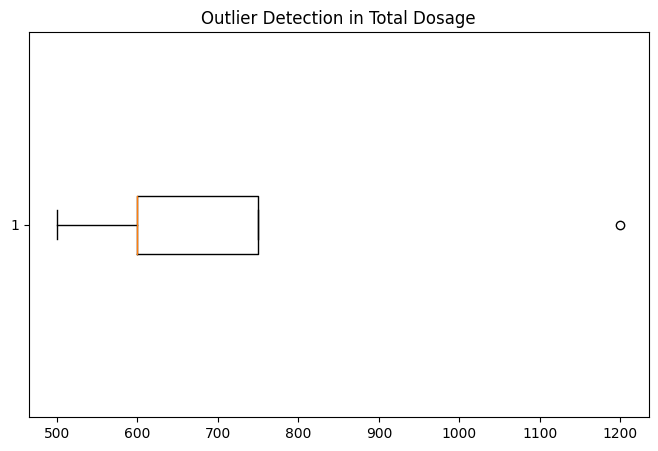

In [ ]:


# 6. Validation (Example: Check for Consistency and Outliers)
def validate_data(df):
    # Check for any negative values in Dosage or Duration (inconsistent data)
    if (df['Dosage_mg'] < 0).any() or (df['Duration_days'] < 0).any():
        print("\nWarning: Inconsistent data detected! Negative values found.")
    else:
        print("\nData is consistent.")

    # Visualize data to check for outliers in Total Dosage
    plt.figure(figsize=(8,5))
    plt.boxplot(df['Total_Dosage'], vert=False)
    plt.title("Outlier Detection in Total Dosage")
    plt.show()

validate_data(enriched_data.head())



1. Basic Python

In [6]:
alist = [1,2,3,4,5]
twoDlist = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
print(alist)
print(twoDlist)
print(alist[0])
print(twoDlist[1])
print(twoDlist[2][2])
print(twoDlist[2][1])

[1, 2, 3, 4, 5]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
1
[4, 5, 6]
9
8


In [7]:
#create dictionary
twoDdict = {
'rx1': {'A': 1, 'B': 2, 'C': 3},
'rx2': {'A': 4, 'B': 5, 'C': 6},
'rx3': {'A': 7, 'B': 8, 'C': 9}
}
print(twoDdict)

{'rx1': {'A': 1, 'B': 2, 'C': 3}, 'rx2': {'A': 4, 'B': 5, 'C': 6}, 'rx3': {'A': 7, 'B': 8, 'C': 9}}


In [14]:
print(twoDdict["rx2"]["C"])
print(alist[1])

6
2


In [17]:
a = [-1,2,4]
b = [3,1,-5]
c = a+b
print(c)

[-1, 2, 4, 3, 1, -5]


In [19]:
import numpy as np

In [20]:
a_array = np.array(a)
b_array = np.array(b)
c = a_array + b_array
c

array([ 2,  3, -1])

In [27]:
d = [
[ "1", "87", "63"],
[ "20", "71", "54" ]
]
d_array = np.array(d)
print(d_array)
print(d_array.shape)
print(d_array.size)
print(d_array.dtype)

[['1' '87' '63']
 ['20' '71' '54']]
(2, 3)
6
<U2


In [32]:
d = [
[19, 87, 63],
[20, 71, 54 ]
]
d_array = np.array(d)
add_scalar = d_array + 5
print(add_scalar)
add_scalar = d_array + d_array
print(add_scalar)

sqrt_array = np.sqrt(d_array)
print(sqrt_array)
print(np.sum(d_array))
print(np.mean(d_array))
print(np.std(d_array))
d_array.T

[[24 92 68]
 [25 76 59]]
[[ 38 174 126]
 [ 40 142 108]]
[[4.35889894 9.32737905 7.93725393]
 [4.47213595 8.42614977 7.34846923]]
314
52.333333333333336
25.243260926873578


array([[19, 20],
       [87, 71],
       [63, 54]])

In [36]:
h = np.array([ [4, 2], [3, 5] ])
matrix_mult = h @ h
print(matrix_mult)
determinant = np.linalg.det(h)
print(determinant)
inverse = np.linalg.inv(h)
print(inverse)
eigenvalues, eigenvectors = np.linalg.eig(h)
print(eigenvalues)
print(eigenvectors)

[[22 18]
 [27 31]]
14.000000000000004
[[ 0.35714286 -0.14285714]
 [-0.21428571  0.28571429]]
[2. 7.]
[[-0.70710678 -0.5547002 ]
 [ 0.70710678 -0.83205029]]


In [40]:
import pandas as pd
data = {
'A': [1, 2],
'B': [6, 7],
'C': [9, 11],
'D': [13,20]
}
print(data)
#การแปลง dictionary ให้เป็น dataframe
df = pd.DataFrame(data,index=['alpha','beta'])
df

{'A': [1, 2], 'B': [6, 7], 'C': [9, 11], 'D': [13, 20]}


,A,B,C,D
alpha,1,6,9,13
beta,2,7,11,20


In [55]:
data = {
'A': pd.Series([1,2], index=['alpha', 'beta']),
'B': pd.Series([6,7], index=['gamma', 'beta']),
'C': pd.Series([9], index=['alpha']),
'D': pd.Series([13,20,22], index=['alpha', 'delta','beta']),
'E': pd.Series([9],index=['beta']),
'F': pd.Series([1,2,3,4,5,6,7])
}
df = pd.DataFrame(data)
df.head()
df.tail(1)
print(df)
print(df.info())
print(df.shape)
print(df.isnull().any())

         A    B    C     D    E    F
alpha  1.0  NaN  9.0  13.0  NaN  NaN
beta   2.0  7.0  NaN  22.0  9.0  NaN
delta  NaN  NaN  NaN  20.0  NaN  NaN
gamma  NaN  6.0  NaN   NaN  NaN  NaN
0      NaN  NaN  NaN   NaN  NaN  1.0
1      NaN  NaN  NaN   NaN  NaN  2.0
2      NaN  NaN  NaN   NaN  NaN  3.0
3      NaN  NaN  NaN   NaN  NaN  4.0
4      NaN  NaN  NaN   NaN  NaN  5.0
5      NaN  NaN  NaN   NaN  NaN  6.0
6      NaN  NaN  NaN   NaN  NaN  7.0
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, alpha to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       2 non-null      float64
 2   C       1 non-null      float64
 3   D       3 non-null      float64
 4   E       1 non-null      float64
 5   F       7 non-null      float64
dtypes: float64(6)
memory usage: 616.0+ bytes
None
(11, 6)
A    True
B    True
C    True
D    True
E    True
F    True
dtype: bool


In [63]:
data = {
'A': [1, 2, 3, 4],
'B': [5, 6, 7, 8],
'C': [9, 10, 11, 12],
'D': [13, 14, 15, 16]
}
df = pd.DataFrame(data, index=['alpha', 'beta', 'gamma', 'delta'])
print(df)
print(df[['D','A','C']])
print(df[['A']])
print(df['A'])

       A  B   C   D
alpha  1  5   9  13
beta   2  6  10  14
gamma  3  7  11  15
delta  4  8  12  16
        D  A   C
alpha  13  1   9
beta   14  2  10
gamma  15  3  11
delta  16  4  12
       A
alpha  1
beta   2
gamma  3
delta  4
alpha    1
beta     2
gamma    3
delta    4
Name: A, dtype: int64


In [65]:
data = {
'A': [1, 2, 3, 4],
'B': [5, 6, 7, 8],
'C': [9, 10, 11, 12],
'D': [13, 14, 15, 16]
}
df = pd.DataFrame(data, index=['alpha', 'beta', 'gamma', 'delta'])
df

,A,B,C,D
alpha,1,5,9,13
beta,2,6,10,14
gamma,3,7,11,15
delta,4,8,12,16


In [76]:
df['p'] = df['A'] + df['B'] + df['C'] + df['D']
df['q'] = df['p']/4
df['r'] = df['q'] > 8.5
#df = df.drop('beta',axis=0) #ชื่อ, axis คือบอกว่าชื่อนี้เป็น index หรือ column name
df

,A,B,C,D,p,q,r
alpha,1,5,9,13,28,7.0,False
gamma,3,7,11,15,36,9.0,True
delta,4,8,12,16,40,10.0,True


In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/ba4e4f56567356ad30aebc554e5927695dcdb326/Dataset/pokemon.csv')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [90]:
#df.info()
#df.isnull().any()
#df.columns
df = df[df['percentage_male'].notna()]
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.0,2.0,...,50.0,779,70,70,92,water,psychic,19.0,7,0
779,"['Berserk', 'Sap Sipper', 'Cloud Nine']",1.0,1.0,2.0,0.5,2.0,2.0,0.5,1.0,0.0,...,50.0,780,135,91,36,normal,dragon,185.0,7,0
781,"['Bulletproof', 'Soundproof', 'Overcoat']",1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,...,50.0,782,45,45,45,dragon,NaN,29.7,7,0
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.5,0.5,2.0,0.5,4.0,1.0,0.5,2.0,1.0,...,50.0,783,65,70,65,dragon,fighting,47.0,7,0


In [96]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [107]:
df_hp = df[df.hp>=125]
df_hp.to_csv('pokemon_hp2.csv')
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,684.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,684.000000,703.000000,703.000000
mean,0.991821,1.022404,0.977240,1.085349,1.072902,1.070413,1.126956,1.222262,0.943812,1.044452,...,1.063596,66.906117,55.155761,387.159317,67.359886,67.708393,63.708393,46.327778,3.615932,0.009957
std,0.592889,0.380872,0.336811,0.669736,0.520521,0.727110,0.688072,0.591318,0.516854,0.814246,...,0.924772,24.952314,20.261623,228.545949,29.576641,26.127651,27.753576,71.329426,1.908260,0.099359
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,10.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.500000,50.000000,50.000000,189.500000,45.000000,50.000000,43.000000,8.575000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.900000,65.000000,50.000000,389.000000,62.000000,65.000000,60.000000,24.450000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.400000,78.000000,50.000000,582.500000,85.000000,83.000000,82.000000,55.000000,5.000000,0.000000
max,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,...,14.500000,255.000000,100.000000,784.000000,175.000000,230.000000,160.000000,920.000000,7.000000,1.000000


In [115]:
df_class = df[['classfication']]

In [120]:
df2 = df[['type1','hp']]
df2.groupby('type1').min()

,hp
type1,
bug,20
dark,35
dragon,41
electric,20
fairy,35
fighting,30
fire,38
flying,40
ghost,20
